## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [21]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [22]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). The helper function 'show_data()' visualizes each given observation.

In [23]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


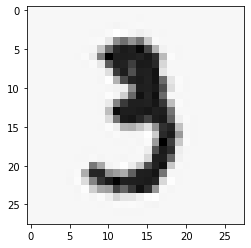

In [24]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


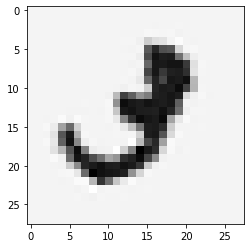

In [25]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


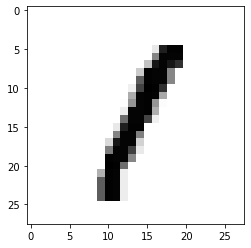

In [26]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [27]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred = RFC.predict(X_test)
print("RandomForest Accuracy : ",metrics.accuracy_score(Y_test,y_pred))

RandomForest Accuracy :  0.73


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

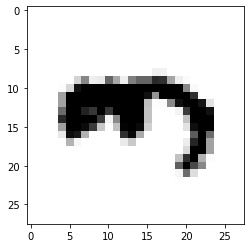

In [28]:
image_matrix = X_train[10,:].reshape((28,28))
image_matrix = rotate(image_matrix, 90, reshape=False)
imax = image_matrix.max()
imin = image_matrix.min()
image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
plt.imshow(image_matrix, cmap='Greys',interpolation='None')

In [29]:
def rotate_data(img , ang):
  img_mat = img.reshape((28,28))
  return rotate(img_mat, ang, reshape=False)

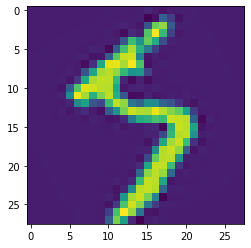

In [30]:
plt.imshow( rotate_data(X_train[0] , 30) )

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [31]:
rotated = []
label = []
i = 0
for img in X_train :
  img1 = rotate_data(img , 60)
  img2 = rotate_data(img , -60)
  img3 = rotate_data(img , 30)
  img4 = rotate_data(img , -30)
  img5 = rotate_data(img , 0)
  l = Y_train[i]
  rotated.append(img1)
  label.append(l)
  rotated.append(img2)
  label.append(l)
  rotated.append(img3)
  label.append(l)
  rotated.append(img4)
  label.append(l)
  rotated.append(img5)
  label.append(l)
  i+=1
  
  

In [32]:
len(rotated)

500

In [33]:
len(label)

500

In [34]:
type(rotated[0])

numpy.ndarray

In [35]:
m= rotated[0]

In [36]:
m.tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.010555627626576107,
  0.008387688425786589,
  0.009516538332333365,
  0.020948284775925696,
  -0.016804147748262208,
  0.020054365733392393,
  -0.023587649027774157,
  0.009600358211109388,
  0.00895710211215414,
  0.010005278358971451,
  0.009993115472243476,
  0.010000088574186893,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.011317613420013724,
  0.00259559469499189,
  0.03691831276667746,
  -0.06275777826731982,
  0.15137469736565096,
  0.4680473840013709,
  0.07713623567690595,
  0.011264632067907086,
  0.011354513194315106,
  0.010061620494475492,
  0.009965969228529445,
  0.009998963257884604,
  0.01000029300059772,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.009946181273937161,
  0.008964951690283768,
  0.01419466835327108,
  0.011919372308537601,
  -0.060431818232304216,
  0.7701432564817546,
  0.900772

In [37]:
x_rot = []
for  i in rotated : 
  r = i.tolist()
  x_rot.append(r)

In [38]:
x_rot[0]

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.010555627626576107,
  0.008387688425786589,
  0.009516538332333365,
  0.020948284775925696,
  -0.016804147748262208,
  0.020054365733392393,
  -0.023587649027774157,
  0.009600358211109388,
  0.00895710211215414,
  0.010005278358971451,
  0.009993115472243476,
  0.010000088574186893,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.011317613420013724,
  0.00259559469499189,
  0.03691831276667746,
  -0.06275777826731982,
  0.15137469736565096,
  0.4680473840013709,
  0.07713623567690595,
  0.011264632067907086,
  0.011354513194315106,
  0.010061620494475492,
  0.009965969228529445,
  0.009998963257884604,
  0.01000029300059772,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.009946181273937161,
  0.008964951690283768,
  0.01419466835327108,
  0.011919372308537601,
  -0.060431818232304216,
  0.7701432564817546,
  0.900772

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [40]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred = RFC.predict(X_test)
print("RandomForest Accuracy : ",metrics.accuracy_score(Y_test,y_pred))

RandomForest Accuracy :  0.66


In [ ]:
# no it didnt , we notice that the accuracy disacreased (0.66 -new value- < 0.73 -previous value-)